# Zachary's Karate Club

In [14]:
import networkx as nx
from community import best_partition
import matplotlib.pyplot as plt

# Load the Karate Club graph
G = nx.karate_club_graph()

## Graph Visualization

In [46]:
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

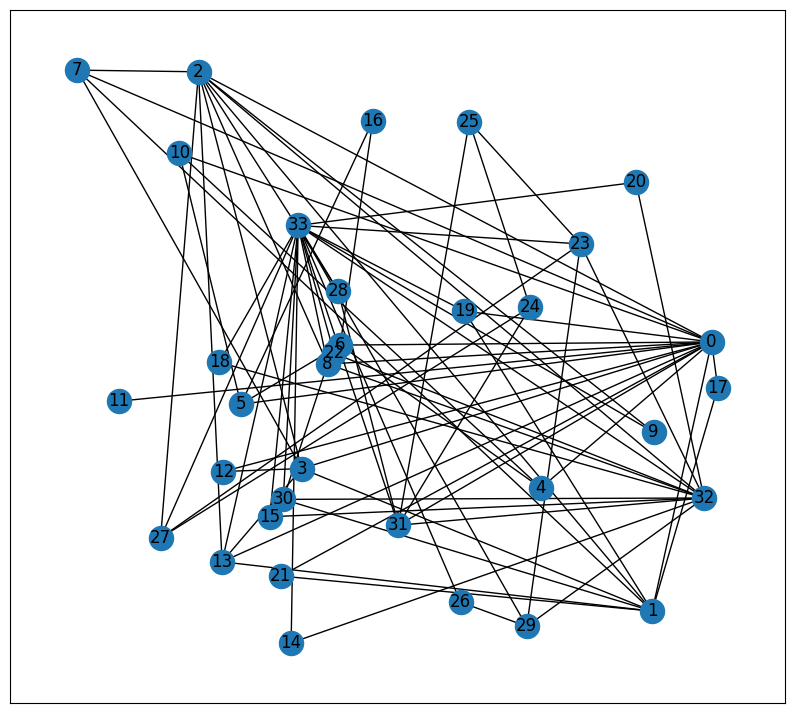

In [47]:
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

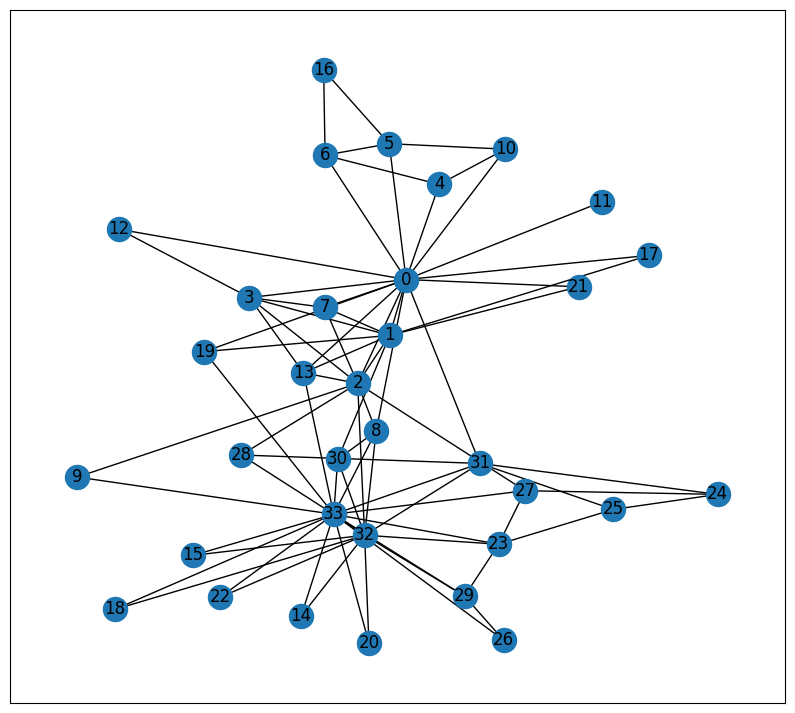

In [51]:
plt.figure(figsize=(10,9))
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos)

__Undirected Graphs__

__Connected__: for every pair nodes, there is a path between them

__Connected components__: `nx.connected_componenets(G)`

__Directed Graphs__

__Strongly connected__: for every pair nodes, there is a _directed_ path between them.

In [35]:
print(nx.is_connected(G))

print(nx.number_connected_components(G))

True
1


__Distance between two nodes__: length of the shortest path between them

__Eccentricity__ of a node _n_ is the largest distance between _n_ and all other nodes

__Diameter__: maximum distance between any pair of nodes

__Radius__: minumum eccentricity in the graph

In [24]:
nx.average_shortest_path_length(G)

2.408199643493761

In [25]:
nx.diameter(G)

5

In [26]:
nx.radius(G)

3

__periphery__: eccentricity = diameter

__center__: eccentricity = radius

In [27]:
nx.periphery(G)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [28]:
nx.center(G)

[0, 1, 2, 3, 8, 13, 19, 31]

## Network Robustness

The ability of a network to maintain its general structural properties when it faces failures or attacks.

__Type of attacks__: removal of nodes or edges.

__Structural properties__: connectivity

What is the smallest number of nodes that can be removed from the graph in order to disconnect it?

In [42]:
print(nx.node_connectivity(G))

print(nx.edge_connectivity(G))

1
1


Which node?

In [43]:
print(nx.minimum_node_cut(G))

print(nx.minimum_edge_cut(G))

{0}
{(11, 0)}


In [5]:
partition = best_partition(G)

# Create a new graph with the same nodes as the original graph
H = nx.Graph()
H.add_nodes_from(G.nodes)

In [ ]:
# Compute the best partition of the graph using the Louvain algorithm
partition = best_partition(G)

# Create a new graph with the same nodes as the original graph
H = nx.Graph()
H.add_nodes_from(G.nodes)

# Add edges between nodes in the same community
for node, community in partition.items():
    for neighbor, neighbor_community in partition.items():
        if community == neighbor_community:
            H.add_edge(node, neighbor)

# Plot the original and reduced graphs
import matplotlib.pyplot as plt
plt.figure()
nx.draw(G, with_labels=True)
plt.figure()
nx.draw(H, with_labels=True)
plt.show()
